In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout
import tensorflow as tf
import datetime
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sys import platform


plt.rcParams["figure.figsize"] = (20,10)

# Importing Data and Creating Test/Train Split

In [2]:
df = pd.read_csv(r"/home/kdudesmith/Dropbox/College/Jackman_Research/data_prep/discontinusous_tansitionless_class_balanced_random_sample.csv")
#df = pd.read_csv(r"C:\Users\kdude\Dropbox\College\Jackman_Research\data_prep\discontinusous_tansitionless_class_balanced_random_sample.csv")

In [3]:
X_train, X_test, y_train, y_test = train_test_split( 
    df.drop(["Location", "OrbitNo", "Date", "X_MSO", "Y_MSO", "Z_MSO"], axis = 1), 
    df["Location"], 
    test_size=0.33, random_state=42)
del df

In [4]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Creating Neural Network 

The below code is done in a for loop as it will be used for tuning hyparameters eventually. It is possible to specify varying numbers of layers, layer sizes and learning rates. Each model will be created, trained and the resulting training and validation accuracies will be sent to a set of logs which can be opened in tensorboard.

For the moment, run this on Windows/Linux if possible. I (Kevin) am not sure how Mac file systems work and need to update this once I do. 

In [5]:
layer_numbers = [1]
layer_sizes = [128]
learning_rates = [0.0001]

for layer_number in layer_numbers:
    for layer_size in layer_sizes:
        for learning_rate in learning_rates: 
            time = datetime.datetime.now().strftime("%Y-%m-%d-%H_%M_%S")
            name = f"Messenger_feed_forward_{layer_number}x{layer_size}_lr-{learning_rate}_time({time})"
            
            

            if platform == "linux" or platform == "linux2":
                # linux
                tensorboard = TensorBoard(log_dir = f'nnlogs/{name}')
            elif platform == "darwin":
                # OS X
                sys.exit("Try on a Windows or Linux machine. Or bug me to figure out Mac directory structure.")  
            elif platform == "win32":
                #Windows
                tensorboard = TensorBoard(log_dir = f'nnlogs\\{name}') #Windows

            
            
            
            model = Sequential() 
            model.add(Flatten())

            for l in range(layer_number):
                model.add(Dense(layer_size, activation = tf.nn.relu))
                model.add(Dropout(0.2))

            model.add(Dense(3, activation=tf.nn.softmax))

            opt = tf.keras.optimizers.Adam(lr = learning_rate, decay = 1e-5)
            model.compile(optimizer=opt,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            model.fit(X_train, y_train, batch_size = 32, validation_split = 0.15, epochs = 10, callbacks = [tensorboard])

Epoch 1/10
103165/103165 [==============================] - 79s 766us/step - loss: 1.2474 - accuracy: 0.6053 - val_loss: 0.6729 - val_accuracy: 0.7440
Epoch 2/10
103165/103165 [==============================] - 79s 765us/step - loss: 0.7029 - accuracy: 0.7287 - val_loss: 0.6493 - val_accuracy: 0.7503
Epoch 3/10
103165/103165 [==============================] - 79s 766us/step - loss: 0.6849 - accuracy: 0.7350 - val_loss: 0.6433 - val_accuracy: 0.7522
Epoch 4/10
103165/103165 [==============================] - 79s 766us/step - loss: 0.6762 - accuracy: 0.7384 - val_loss: 0.6405 - val_accuracy: 0.7529
Epoch 5/10
103165/103165 [==============================] - 79s 763us/step - loss: 0.6765 - accuracy: 0.7384 - val_loss: 0.6379 - val_accuracy: 0.7519
Epoch 6/10
103165/103165 [==============================] - 79s 762us/step - loss: 0.6752 - accuracy: 0.7388 - val_loss: 0.6355 - val_accuracy: 0.7518
Epoch 7/10
103165/103165 [==============================] - 79s 770us/step - loss: 0.6737 - ac

## Model Evalutation
The model is evaluated _via_ accuracy scores and a confusion matrix. 

In [6]:
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

val_loss, val_acc = model.evaluate(X_test, y_test)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

59780/59780 [==============================] - 31s 525us/step - loss: 0.6372 - accuracy: 0.7530
Validation Loss: 0.6372271180152893
Validation Accuracy: 0.7530137896537781


In [7]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis = 1)

In [8]:
messenger_confussion_matrix = confusion_matrix(y_pred, y_test)

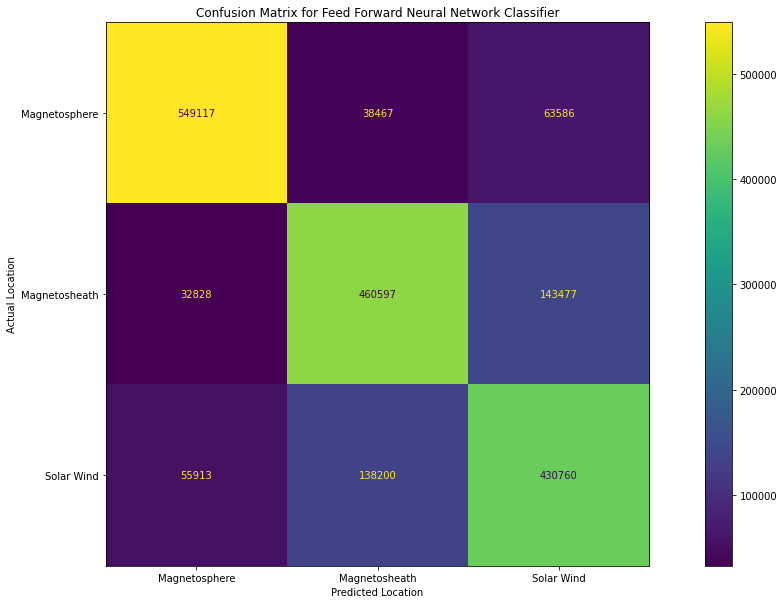

In [9]:

cmd_obj = ConfusionMatrixDisplay(messenger_confussion_matrix, display_labels=["Magnetosphere", "Magnetosheath", "Solar Wind"])


cmd_obj.plot()

cmd_obj.ax_.set(
                title='Confusion Matrix for Feed Forward Neural Network Classifier', 
                xlabel='Predicted Location', 
                ylabel='Actual Location')


plt.show()